# TMDB 5000 Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**:this is a data set about TMDB 5000 Movie
we explore it through this list of variabels
("original_title","genres","release_date","release_year","budget_adj","revenue_adj","popularity")
and trying to answer some questions as :
1:relation between genres and revenue 
2:relation between month release and revenue 
3:changing of budget through time 
4:changing of genres popularity through time 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# loading data frame and exploring first 5 rows
df = pd.read_csv("tmdb-movies.csv")
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# This method prints information about a DataFrame including the index dtype and columns, non-null values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [4]:
#showing shape of data frame
df.shape

(10866, 21)

In [5]:
#showing statistical information summary
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Data Cleaning (Replace this with more specific notes!)

In [6]:
df = df[["original_title","genres","release_date","release_year","budget_adj","revenue_adj","popularity","runtime","vote_average"]]
df["release_date"]=pd.to_datetime(df["release_date"])
df["release_month"]=df["release_date"].dt.month
df.drop("release_date",axis=1,inplace=True)
df.head()

,original_title,genres,release_year,budget_adj,revenue_adj,popularity,runtime,vote_average,release_month
0,Jurassic World,Action|Adventure|Science Fiction|Thriller,2015,1.379999e+08,1.392446e+09,32.985763,124,6.5,6
1,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,2015,1.379999e+08,3.481613e+08,28.419936,120,7.1,5
2,Insurgent,Adventure|Science Fiction|Thriller,2015,1.012000e+08,2.716190e+08,13.112507,119,6.3,3
3,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy,2015,1.839999e+08,1.902723e+09,11.173104,136,7.5,12
4,Furious 7,Action|Crime|Thriller,2015,1.747999e+08,1.385749e+09,9.335014,137,7.3,4


In [17]:
# slicing genres of movies according most prominent type
def first_word(column):
    df[str(column)]=df[str(column)].str.split("|",expand=True)
column="genres"
first_word(column)   
df.head()

,original_title,genres,release_year,budget_adj,revenue_adj,popularity,runtime,vote_average,release_month
0,Jurassic World,Action,2015,1.379999e+08,1.392446e+09,32.985763,124,6.5,6
1,Mad Max: Fury Road,Action,2015,1.379999e+08,3.481613e+08,28.419936,120,7.1,5
2,Insurgent,Adventure,2015,1.012000e+08,2.716190e+08,13.112507,119,6.3,3
3,Star Wars: The Force Awakens,Action,2015,1.839999e+08,1.902723e+09,11.173104,136,7.5,12
4,Furious 7,Action,2015,1.747999e+08,1.385749e+09,9.335014,137,7.3,4


In [8]:
#showing if there is null values
df.isnull().sum()

original_title     0
genres            23
release_year       0
budget_adj         0
revenue_adj        0
popularity         0
runtime            0
vote_average       0
release_month      0
dtype: int64

In [9]:
#showing if there is null values
df.duplicated().sum()

1

##### the data is clean

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### histogram data

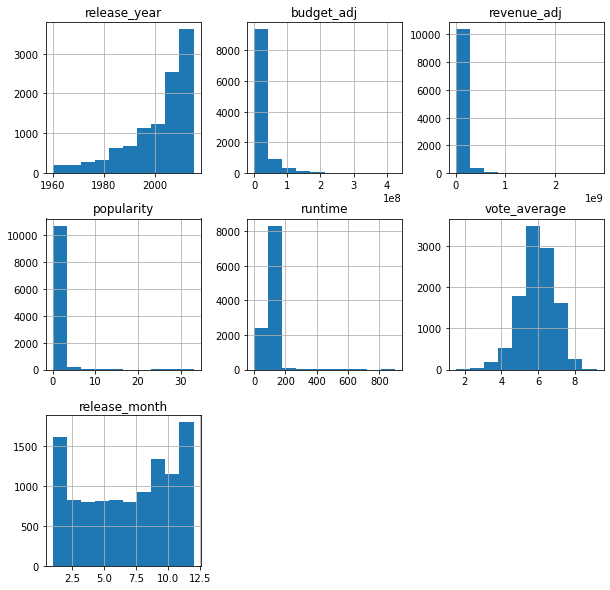

In [10]:
df.hist(figsize=(10,10));

### badget moving with time

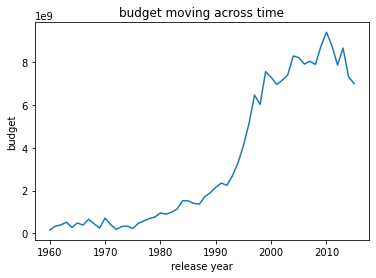

In [11]:
df.groupby("release_year").budget_adj.sum().plot();
plt.title("budget moving across time");
plt.xlabel("release year");
plt.ylabel("budget");

### How is popularity trending over time?

Text(0.5, 1.0, 'popularity trending over time')

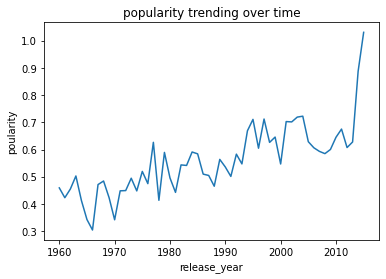

In [25]:
df.groupby("release_year").popularity.mean().plot()
plt.ylabel("poularity")
plt.title("popularity trending over time")

popularity is waving over time incracing and decreasing but it fixes after 2010

### How is runtime trending over time?

Text(0.5, 1.0, 'runtime trending over time')

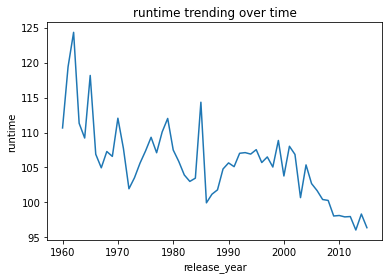

In [26]:
df.groupby("release_year").runtime.mean().plot()
plt.ylabel("runtime")
plt.title("runtime trending over time")

run times is waving over time but we can see that it is decreasing over time till 2010

### affect of genres across revenue

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

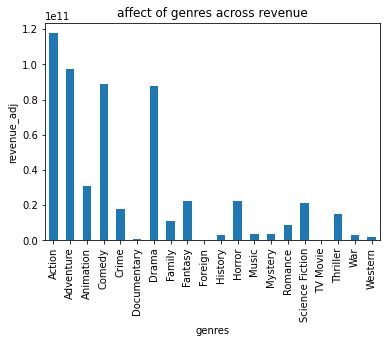

In [12]:
df.groupby("genres").revenue_adj.sum().plot(kind="bar")
plt.title("affect of genres across revenue");
plt.xlabel("genres");
plt.ylabel("revenue_adj");
plt.plot

we can see that some genres have higher revenues like action genres, adventure, comedy and drama 

### Do top ratings movies always generate big revenue?

Text(0.5, 1.0, 'relation between rating and revenues')

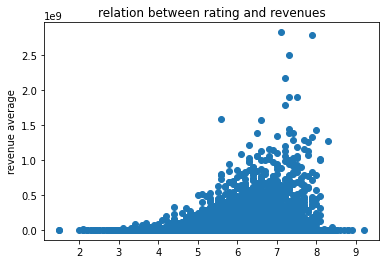

In [35]:
x=df["vote_average"]
y=df["revenue_adj"]
plt.scatter(x=x,y=y)
plt.ylabel("revenue average")
plt.title("relation between rating and revenues")

we can see that the relation between rating and revenue is semi linear so we the rating is high also revenue is also high 

### relation of release month and revenue

Text(0.5, 1.0, 'relation of release month and revenue')

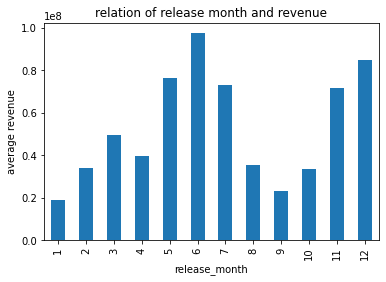

In [14]:
df.groupby("release_month").revenue_adj.mean().plot(kind="bar");
plt.ylabel("average revenue");
plt.title("relation of release month and revenue")

we can see here month 6 is best month for revenues then month 12 then monts 5,6and 11 in the same degree
so we recommend this months for releasing movies to get the highest revenues 

<a id='conclusions'></a>
## Conclusions

> **Tip**:after cleaning data and visualing it we can see :
>1: film budget is icreasing across time 
>2: genres of film affect on its revenue 
best catigory is action and adventure 
>3:popularity of films is changing through time 
most popular film type 1960 is action while war is the most popular in 2015
>4:realease month affect on film revenue so june month have the highest revenue
> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.
# limitations 
there are some missed data that prevented us to make the best results for data analysis 
and there are some duplicated data 
and we also need some more data about countries data are showen in to know the most powerful countries for revenues 
thanks

In [15]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1